# Knapsack Problem with Integer Weights

In [4]:
import random
import math
import time
import matplotlib.pyplot as plt

Dynamic Programming for Knapsack Problem

In [5]:
def dpKnapsackAlgorithm(weights,values,w) :
    startTime = time.time()
    opt = [[0 for i in range(w+1)] for j in range(len(values)+1)]
    for i in range(1,len(values)+1) :
        for j in range(w+1) :
            if weights[i-1] > j :
                opt[i][j] = opt[i-1][j]
            else :
                if opt[i-1][j] > opt[i-1][j-weights[i-1]]+values[i-1] :
                    opt[i][j] = opt[i-1][j]
                else :
                    opt[i][j] = opt[i-1][j-weights[i-1]]+values[i-1]

    return time.time() - startTime 

Bruteforce algorithm for Knapsack Problem

In [6]:
def bfKnapsackAlgorithm(weights,values,w) :
    startTime = time.time()
    binarySubsets = [False for i in range(len(values))]
    bfKnapsackAlgorithmUtill(weights,values,w,binarySubsets,0)
    return time.time() - startTime

def bfKnapsackAlgorithmUtill(weights,values,w,binarySubsets,i,max = [0]) :
    if i == len(values) :
        weight = 0
        value = 0
        for j in range(i) :
            if binarySubsets[j] :
                weight += weights[j]
                value += values[j]
        if weight <= w :
            if max[0] < value :
                max[0] = value
        return

    binarySubsets[i] = True
    bfKnapsackAlgorithmUtill(weights,values,w,binarySubsets,i+1)

    binarySubsets[i] = False
    bfKnapsackAlgorithmUtill(weights,values,w,binarySubsets,i+1)
    return max[0]

Prdoucing arrays with random Integer number

In [7]:
def randomIntArray(max,len) :
    return [random.randint(0,max) for i in range(len)]

Comparison in base of increasing number of elements

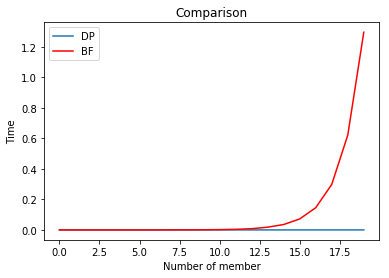

In [8]:
bruteForceTime = [0]
dpTime = [0]
for i in range(1,20) :
    weights = randomIntArray(i*2,i)
    values = randomIntArray(i*2,i)
    w = 10
    bruteForceTime.append(bfKnapsackAlgorithm(weights,values,w))
    dpTime.append(dpKnapsackAlgorithm(weights,values,w))
plt.plot(list(range(20)),dpTime,label="DP")
plt.plot(list(range(20)),bruteForceTime,color = "r",label="BF")
plt.xlabel('Number of member')
plt.ylabel('Time')
plt.title('Comparison')
plt.legend()
plt.show()

# Knapsack Problem with Real Weights

A funtion to map real weights to Integer Weights and then calling dynamic Programming algorithm

In [36]:
def nIDpKnapsackAlgorithm(weights,values,w) :
    startTime = time.time()
    maxFloatingPoint = 0
    #finding the weight with most floating point
    for weight in weights :
        floatingPointNum = 0
        weight = str(weight)
        for index in range(len(weight)) :
            if weight[index] == "." :
                floatingPointNum = len(weight) - index -1
        if maxFloatingPoint < floatingPointNum :
            maxFloatingPoint = floatingPointNum

    weights = [int(i*math.pow(10,maxFloatingPoint-13)) for i in weights]
    w = int(w * math.pow(10,maxFloatingPoint-13))
#     maxNagativeNumber = 0
#     for weight in weights :
#         if weight < 0 :
#             maxNagativeNumber = max(math.fabs(weight),maxNagativeNumber)

#     weights = [int(i + maxNagativeNumber) for i in weights]
#     w = int(w + maxNagativeNumber) 
    dpKnapsackAlgorithm(weights,values,w)
    return time.time() - startTime

Producing array with random real numbers more than 0 

In [34]:
def randomArray(max,len) :
    return [random.uniform(0,max) for i in range(len)]

Comparison in base of increasing number of elements

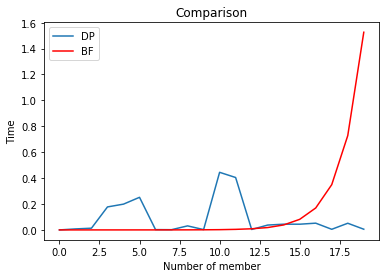

In [37]:
bruteForceTime = [0]
noneIntegerDpTime = [0]
for i in range(1,20) :
    weights = randomArray(i*2,i)
    values = randomArray(i*2,i)
    w = 10
    bruteForceTime.append(bfKnapsackAlgorithm(weights,values,w))
    noneIntegerDpTime.append(nIDpKnapsackAlgorithm(weights,values,w))
plt.plot(list(range(20)),noneIntegerDpTime,label="DP")
plt.plot(list(range(20)),bruteForceTime,color = "r",label="BF")
plt.xlabel('Number of member')
plt.ylabel('Time')
plt.title('Comparison')
plt.legend()
plt.show()